# Lab 6
### Daniel Mehta

## 1: Setup Pre-trained model to generate a scenery image for a futuristic movie

- Follow the tutorial code on running text-to-image with stable diffusion.
- Adjust the code use torch.Generator() to produce a reproducible pipeline.

In [1]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
from IPython.display import display

In [2]:
model_id = "runwayml/stable-diffusion-v1-5" 

In [3]:
pipe = StableDiffusionPipeline.from_pretrained(
    model_id, torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

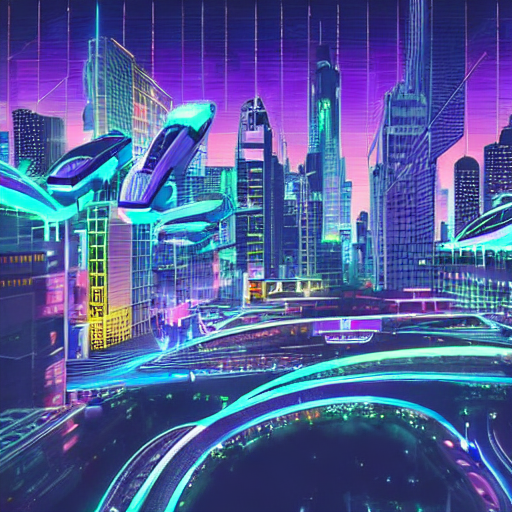

In [4]:
prompt = "A futuristic city at night with neon lights and flying cars"
generator = torch.Generator("cuda").manual_seed(5004)

image = pipe(prompt=prompt, generator=generator, guidance_scale=7.5).images[0]

display(image)

## 2: Customize the scenery
- Experiment with different prompts to include specific details to the image.
- Review and experiment with parameters like height, width, guidance scale, and
negative prompt.

  0%|          | 0/50 [00:00<?, ?it/s]

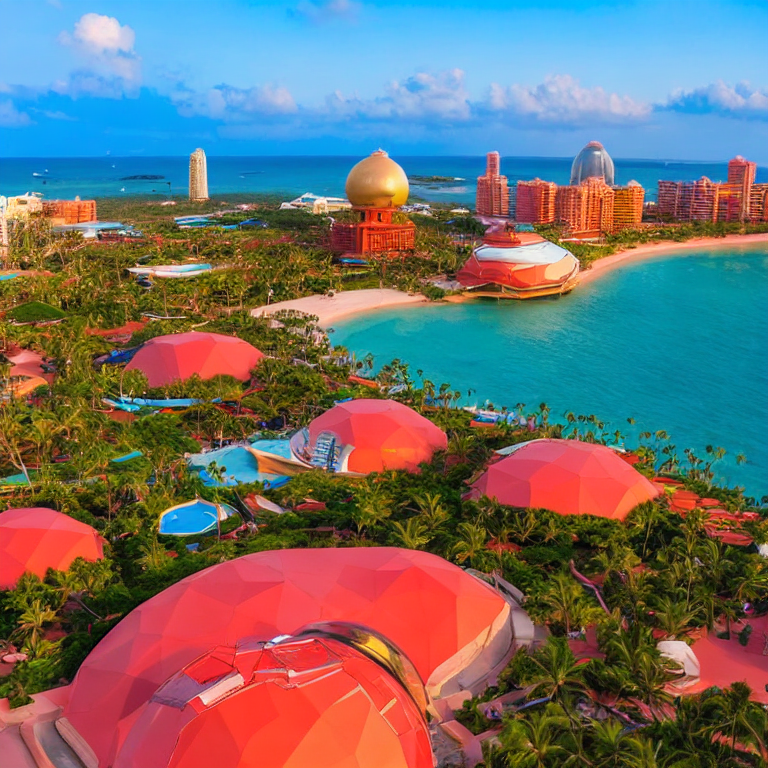

In [5]:
image = pipe(
    prompt="A futuristic city on island during sunset, domes and red sand everywhere",
    negative_prompt="blurry, boring, monochrome, deformed",
    guidance_scale=10.0,
    height=768,
    width=768,
    generator=generator
).images[0]
display(image)


## 3. Compare different Pre-trained Models
- Review the available pre-trained models on hugging face.
- Identify any models that can be used for application of text-guided image generation.
- Adjust the code to use the pre-trained models and compare the generated images

In [6]:
model_id = "dreamlike-art/dreamlike-photoreal-2.0"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    safety_checker=None
).to("cuda")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

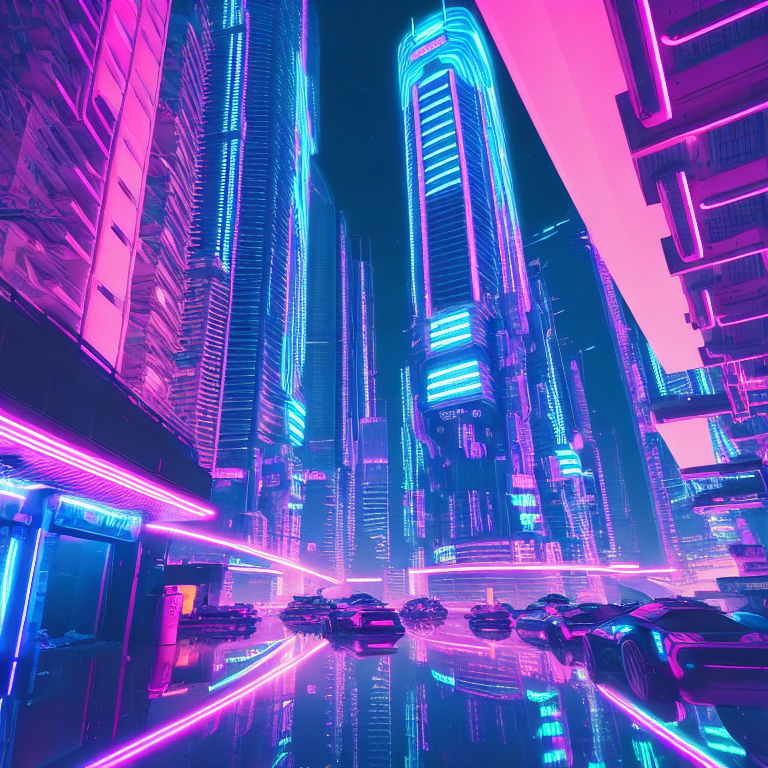

In [7]:
prompt = "A cyberpunk-inspired futuristic city at night, glowing neon lights in blue and pink, flying vehicles, high-tech skyscrapers, misty streets, cinematic lighting"

image = pipe(
    prompt=prompt,
    guidance_scale=7.5,
    generator=generator
).images[0]

display(image)